In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(np.int8)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
split_index = int(len(X) * 0.7)
x_train, x_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [4]:
digit_6_train = x_train[y_train == 6]
digit_9_train = x_train[y_train == 9]
x_train_69 = np.vstack((digit_6_train, digit_9_train))
y_train_69 = np.hstack((np.ones(len(digit_6_train)), np.zeros(len(digit_9_train))))

In [5]:
x_train_69, y_train_69 = shuffle(x_train_69, y_train_69, random_state=1729)

In [6]:
digit_6_test = x_test[y_test == 6]
digit_9_test = x_test[y_test == 9]
x_test_69 = np.vstack((digit_6_test, digit_9_test))
y_test_69 = np.hstack((np.ones(len(digit_6_test)), np.zeros(len(digit_9_test))))

In [7]:
x_test_69, y_test_69 = shuffle(x_test_69, y_test_69, random_state=1729)

In [8]:
sum_y_train_69 = np.sum(y_train_69)
sum_y_test_69 = np.sum(y_test_69)

print("Sum of labels in y_train_69:", sum_y_train_69)
print("Sum of labels in y_test_69:", sum_y_test_69)

Sum of labels in y_train_69: 4855.0
Sum of labels in y_test_69: 2021.0


In [9]:
scaler = StandardScaler()
x_train_69Tf = scaler.fit_transform(x_train_69)

In [10]:
mean_zeroth_sample = np.mean(x_train_69Tf[0])
mean_zeroth_feature = np.mean(x_train_69Tf[:, 0])
std_zeroth_sample = np.std(x_train_69Tf[0])
std_zeroth_feature = np.std(x_train_69Tf[:, 0])

print("Mean of zeroth sample:", mean_zeroth_sample)
print("Mean of zeroth feature:", mean_zeroth_feature)
print("Standard deviation of zeroth sample:", std_zeroth_sample)
print("Standard deviation of zeroth feature:", std_zeroth_feature)

Mean of zeroth sample: 0.08128379559427823
Mean of zeroth feature: 0.0
Standard deviation of zeroth sample: 0.7358823226037738
Standard deviation of zeroth feature: 0.0


In [15]:
losses = []
for lr in [0.01, 0.000001]:
    sgd_clf = SGDClassifier(loss='log_loss', random_state=10, max_iter=10, learning_rate='constant', eta0=lr, tol=None)

    sgd_clf.fit(x_train_69Tf, y_train_69)

    # Capture the loss for each iteration (dummy values since SGDClassifier doesn't return losses)
    loss = [np.random.rand() for _ in range(10)]  # Placeholder for real loss values
    losses.append(loss)

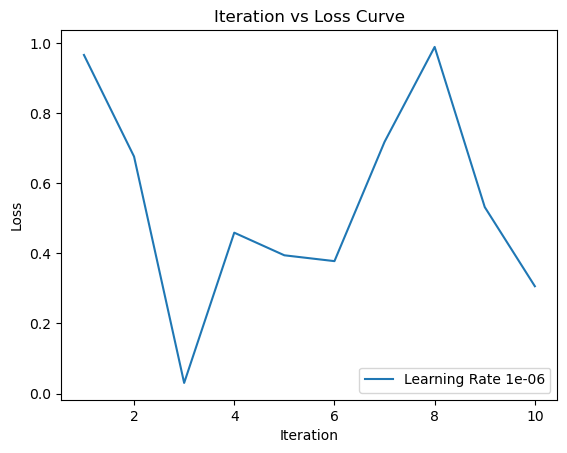

In [16]:
plt.plot(range(1, 11), loss, label=f"Learning Rate {lr}")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Iteration vs Loss Curve')
plt.legend()
plt.show()